In [1]:


import pandas as pd


import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10



from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('once')



In [2]:
data = pd.read_csv('data/sp500_stocks.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#sort by Date
data.sort_values(by='Date', inplace=True)
#add 25 and 50 rolling avergaed of close by Symbol
data['25ma'] = data.groupby('Symbol')['Close'].shift().rolling(window=25).mean()
data['50ma'] = data.groupby('Symbol')['Close'].shift().rolling(window=50).mean()
data['100ma'] = data.groupby('Symbol')['Close'].shift().rolling(window=100).mean()  
data['200ma'] = data.groupby('Symbol')['Close'].shift().rolling(window=200).mean()

#drop rows with NaN

data.tail()

#set frequency to daily




,Symbol,Adj Close,Close,High,Low,Open,Volume,25ma,50ma,100ma,200ma
Date,,,,,,,,,,,
2024-03-18,LW,102.860001,102.860001,103.570000,100.559998,101.599998,1242540.0,206.190803,180.387401,170.649901,186.52080
2024-03-18,GD,277.600006,277.600006,277.720001,274.670013,275.989990,850451.0,214.685203,183.910201,173.198601,187.49295
2024-03-18,HAS,53.290001,53.290001,53.466000,52.959999,53.250000,1173531.0,206.531603,181.980401,173.388401,185.99835
2024-03-18,CTVA,54.709999,54.709999,55.450001,54.520000,55.450001,2943730.0,193.399603,180.014801,172.464501,185.94265
2024-03-18,ZTS,170.690002,170.690002,174.279999,170.410004,173.740005,4919422.0,194.271603,180.708202,172.912901,186.22535


In [3]:
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
data.dropna(subset=['Close', '25ma', '50ma', '100ma', '200ma'], inplace=True)
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')
print(len(data))

Number of rows with missing values: 0.9105034130879062
Number of rows with missing values: 0.0
Number of rows with missing values: 0.0
160935


In [4]:
#split data into train and test
data_msft = data[data['Symbol'] == 'MSFT']
print(data_msft.head())
data_msft = data_msft.asfreq('D')

#print missing values
print(f'Number of rows with missing values: {data_msft.isnull().any(axis=1).mean()}')
#display entire dataframe
print(display(data_msft))
#drop rows with missing values
data_msft.dropna(subset=['Close', '25ma', '50ma', '100ma', '200ma'], inplace=True)


           Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2019-05-24   MSFT  120.611702  126.239998  127.419998  125.970001  126.910004   
2019-11-01   MSFT  137.769608  143.720001  144.419998  142.970001  144.259995   
2020-01-14   MSFT  155.946259  162.130005  163.600006  161.720001  163.389999   
2020-01-15   MSFT  156.956207  163.179993  163.940002  162.570007  162.619995   
2020-04-02   MSFT  149.746155  155.259995  155.479996  150.360001  151.860001   

                Volume        25ma        50ma       100ma       200ma  
Date                                                                    
2019-05-24  14123400.0  136.955201  122.704371  139.135321  120.469049  
2019-11-01  33128400.0  148.434533  152.303112  165.926005  134.876586  
2020-01-14  23477400.0  124.910484  112.794976  123.317006  115.525291  
2020-01-15  21417900.0  116.753061  124.872040  127.954844  128.199

,Symbol,Adj Close,Close,High,Low,Open,Volume,25ma,50ma,100ma,200ma
Date,,,,,,,,,,,
2019-05-24,MSFT,120.611702,126.239998,127.419998,125.970001,126.910004,14123400.0,136.955201,122.704371,139.135321,120.469049
2019-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14,MSFT,425.220001,425.220001,427.820007,417.989990,420.239990,34157300.0,342.018402,280.160601,263.200501,235.091000
2024-03-15,MSFT,416.420013,416.420013,422.600006,412.790009,419.290009,45049800.0,348.843201,246.276001,252.929701,230.910400
2024-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None


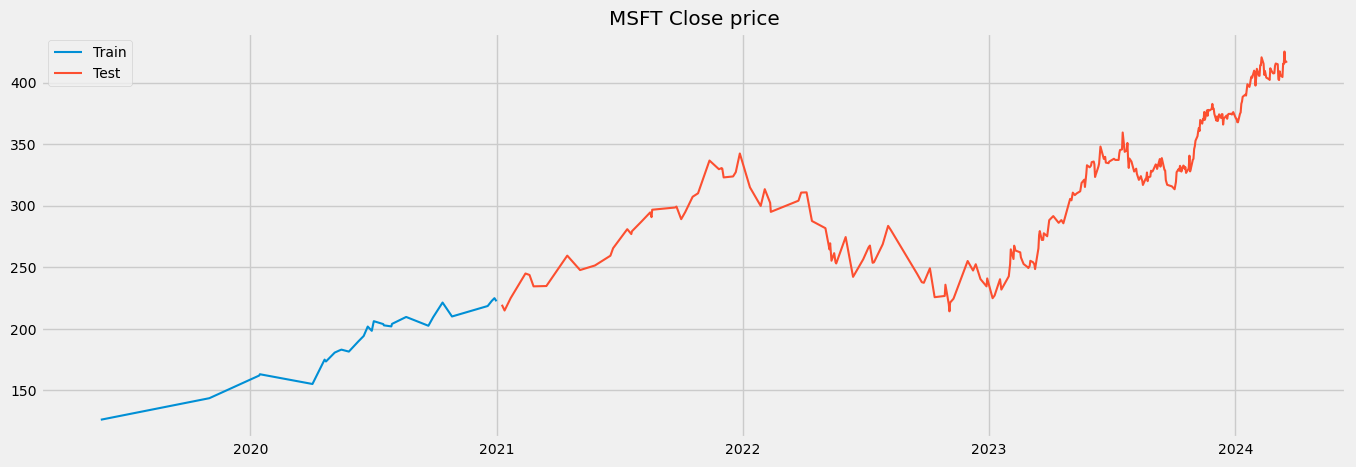

Number of rows with missing values: 0.0
Number of rows with missing values: 0.0


In [5]:

#set frequency to daily
data_train_msft = data_msft.loc[data_msft.index < '2021-01-01']
data_test_msft = data_msft.loc[data_msft.index >= '2021-01-01']

#plot the data
plt.figure(figsize=(15, 5))
plt.plot(data_train_msft.index, data_train_msft['Close'], label='Train')
plt.plot(data_test_msft.index, data_test_msft['Close'], label='Test')

plt.title('MSFT Close price')
plt.legend()
plt.show()

print(f'Number of rows with missing values: {data_train_msft.isnull().any(axis=1).mean()}')
print(f'Number of rows with missing values: {data_test_msft.isnull().any(axis=1).mean()}')

In [6]:
data_train_msft.tail()
#count percentage of missing values
print(f'Percentage of missing values in Close: {data_train_msft["Close"].isnull().mean()}')


#drop columns except data, 25ma, 50ma, Close
data_train_msft = data_train_msft[['Close', '25ma', '50ma', '100ma', '200ma']]

data_test_msft = data_test_msft[['Close', '25ma', '50ma', '100ma', '200ma']]

#drop rows with missing values


#count percentage of missing values
print(f'Percentage of missing values in Close: {data_train_msft["Close"].isnull().mean()}')

data_train_msft.tail()

Percentage of missing values in Close: 0.0
Percentage of missing values in Close: 0.0


,Close,25ma,50ma,100ma,200ma
Date,,,,,
2020-10-26,210.080002,114.061099,133.514550,119.914974,116.029774
2020-12-18,218.589996,138.772532,128.747250,132.924926,170.739415
2020-12-24,222.750000,146.701054,151.790461,136.107346,139.351175
2020-12-28,224.960007,185.367803,149.170031,147.185144,142.607330
2020-12-31,222.419998,106.732085,156.327243,200.435886,192.774242


In [7]:
display(data_test_msft)
#drop rows with missing values
data_test_msft.dropna(subset=['Close', '25ma', '50ma', '100ma', '200ma'], inplace=True)
data_test_msft.tail()

,Close,25ma,50ma,100ma,200ma
Date,,,,,
2021-01-08,219.619995,130.313989,143.004486,143.189571,139.449868
2021-01-12,214.929993,138.327066,224.687335,176.860362,160.990129
2021-01-21,224.970001,128.587522,119.229880,194.284271,174.971549
2021-02-12,244.990005,128.346001,144.749456,147.504960,136.614949
2021-02-18,243.789993,193.900398,173.583766,152.911001,145.129785
...,...,...,...,...,...
2024-03-12,415.279999,209.746799,194.343799,192.712999,188.999050
2024-03-13,415.100006,197.623600,200.490401,180.512400,205.103200
2024-03-14,425.220001,342.018402,280.160601,263.200501,235.091000


,Close,25ma,50ma,100ma,200ma
Date,,,,,
2024-03-12,415.279999,209.746799,194.343799,192.712999,188.99905
2024-03-13,415.100006,197.623600,200.490401,180.512400,205.10320
2024-03-14,425.220001,342.018402,280.160601,263.200501,235.09100
2024-03-15,416.420013,348.843201,246.276001,252.929701,230.91040
2024-03-18,417.320007,128.220402,123.685201,177.634600,226.67570


Train error: 101.30000929054464
Test error: 146.66817143822232


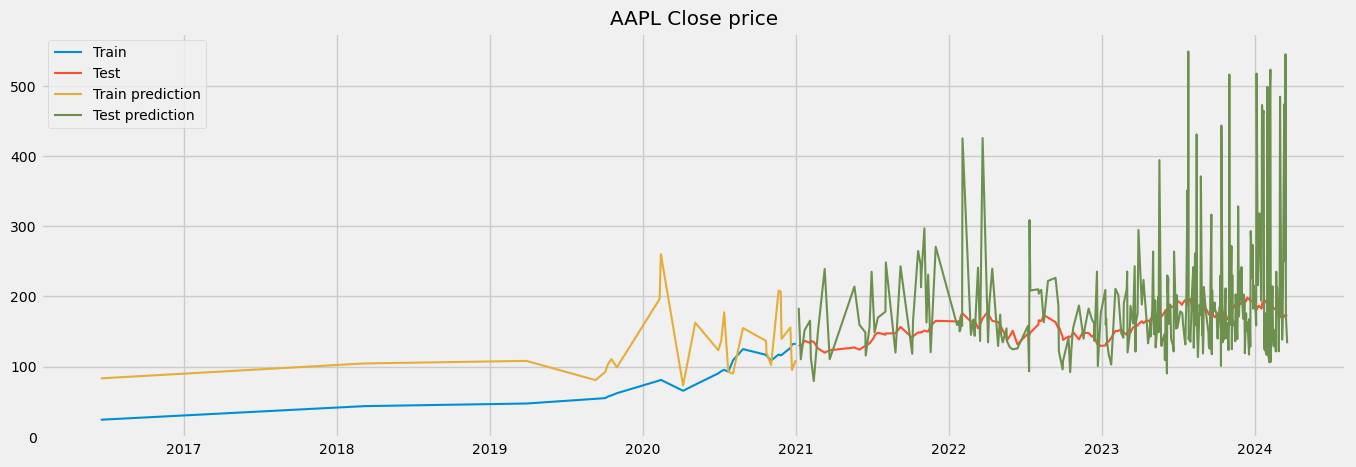

In [8]:
#forcast the close price using the 25ma and 50ma
#train the model_Ridge
data_train = data.loc[data.index < '2021-01-01']
data_test = data.loc[data.index >= '2021-01-01']

X_train = data_train[['25ma', '50ma', '100ma', '200ma']]
y_train = data_train['Close']

X_test = data_test[['25ma', '50ma', '100ma', '200ma']]
y_test = data_test['Close']

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model_Ridge
model_Ridge = Ridge()
model_Ridge.fit(X_train_scaled, y_train)

#predict the close price
y_train_pred = model_Ridge.predict(X_train_scaled)

y_test_pred = model_Ridge.predict(X_test_scaled)

#print train and test error
print(f'Train error: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Test error: {mean_absolute_error(y_test, y_test_pred)}')


#filter predictions and actual values by one symbol == 'AAPL'


#plot the results
plt.figure(figsize=(15, 5))
plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, data_train.loc[data_train['Symbol'] == 'AAPL']['Close'], label='Train')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, data_test.loc[data_test['Symbol'] == 'AAPL']['Close'], label='Test')

plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, y_train_pred[data_train['Symbol'] == 'AAPL'], label='Train prediction')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, y_test_pred[data_test['Symbol'] == 'AAPL'], label='Test prediction')

plt.title('AAPL Close price')
plt.legend()


# SGQRegressor

Train error: 101.80777023402885
Test error: 158.9723822263949


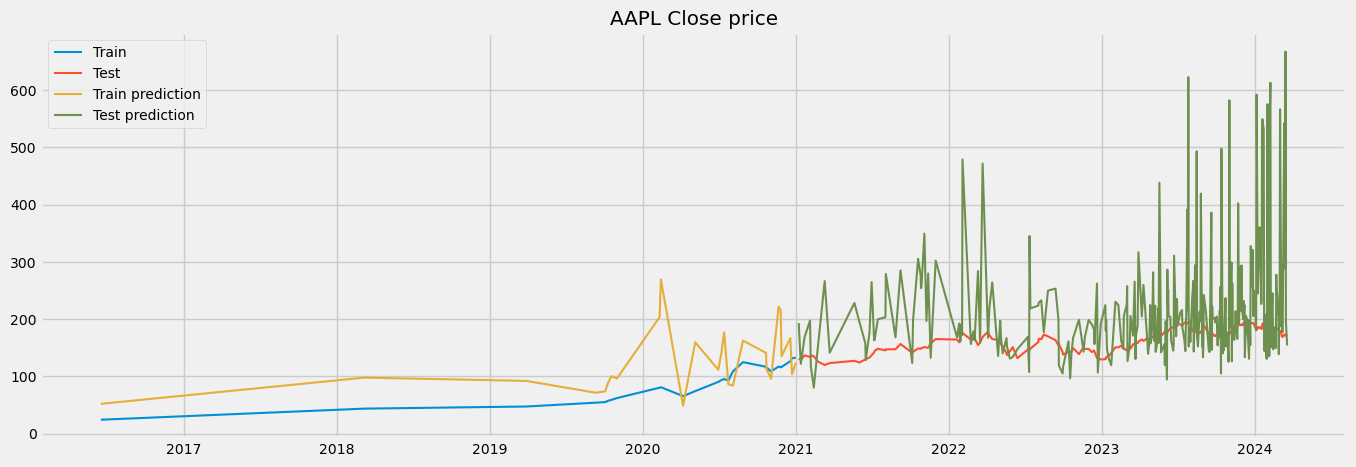

In [9]:
#forcast the close price using the 25ma and 50ma
#train the model_Ridge
data_train = data.loc[data.index < '2021-01-01']
data_test = data.loc[data.index >= '2021-01-01']

X_train = data_train[['25ma', '50ma', '100ma', '200ma']]
y_train = data_train['Close']

X_test = data_test[['25ma', '50ma', '100ma', '200ma']]
y_test = data_test['Close']

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model_Ridge
model_Ridge = SGDRegressor()
model_Ridge.fit(X_train_scaled, y_train)

#predict the close price
y_train_pred = model_Ridge.predict(X_train_scaled)

y_test_pred = model_Ridge.predict(X_test_scaled)

#print train and test error
print(f'Train error: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Test error: {mean_absolute_error(y_test, y_test_pred)}')


#filter predictions and actual values by one symbol == 'AAPL'


#plot the results
plt.figure(figsize=(15, 5))
plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, data_train.loc[data_train['Symbol'] == 'AAPL']['Close'], label='Train')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, data_test.loc[data_test['Symbol'] == 'AAPL']['Close'], label='Test')

plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, y_train_pred[data_train['Symbol'] == 'AAPL'], label='Train prediction')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, y_test_pred[data_test['Symbol'] == 'AAPL'], label='Test prediction')

plt.title('AAPL Close price')
plt.legend()


Train error: 38.950029531001746
Test error: 392.0472406430253


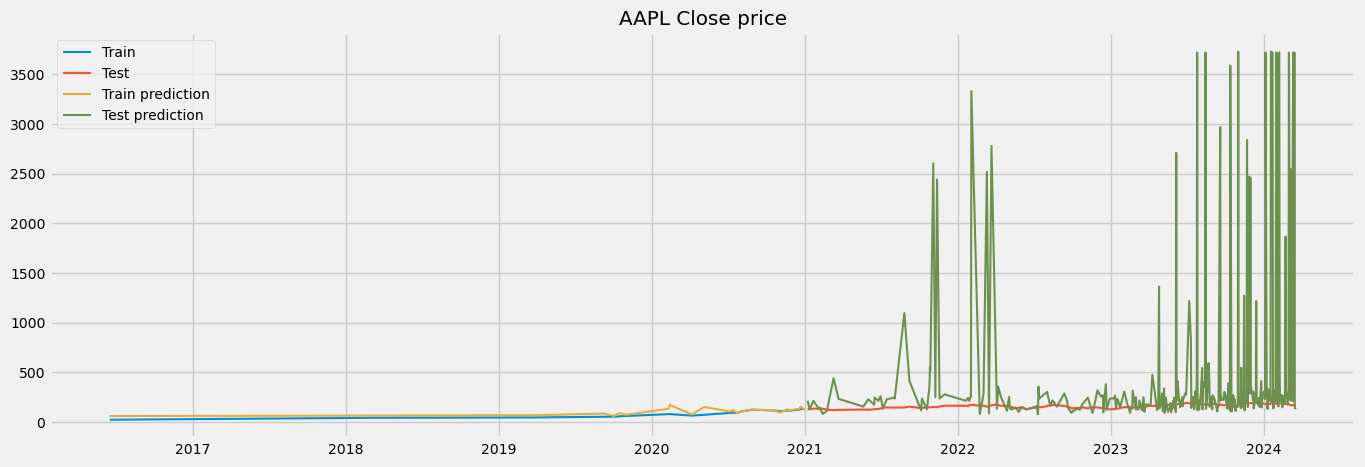

In [10]:
#forcast the close price using the 25ma and 50ma
#train the model_Ridge
data_train = data.loc[data.index < '2021-01-01']
data_test = data.loc[data.index >= '2021-01-01']

X_train = data_train[['25ma', '50ma', '100ma', '200ma']]
y_train = data_train['Close']

X_test = data_test[['25ma', '50ma', '100ma', '200ma']]
y_test = data_test['Close']

#standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model_Ridge
model_Ridge = RandomForestRegressor(n_estimators=1000)
model_Ridge.fit(X_train_scaled, y_train)

#predict the close price
y_train_pred = model_Ridge.predict(X_train_scaled)

y_test_pred = model_Ridge.predict(X_test_scaled)

#print train and test error
print(f'Train error: {mean_absolute_error(y_train, y_train_pred)}')
print(f'Test error: {mean_absolute_error(y_test, y_test_pred)}')


#filter predictions and actual values by one symbol == 'AAPL'


#plot the results
plt.figure(figsize=(15, 5))
plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, data_train.loc[data_train['Symbol'] == 'AAPL']['Close'], label='Train')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, data_test.loc[data_test['Symbol'] == 'AAPL']['Close'], label='Test')

plt.plot(data_train.loc[data_train['Symbol'] == 'AAPL'].index, y_train_pred[data_train['Symbol'] == 'AAPL'], label='Train prediction')
plt.plot(data_test.loc[data_test['Symbol'] == 'AAPL'].index, y_test_pred[data_test['Symbol'] == 'AAPL'], label='Test prediction')

plt.title('AAPL Close price')
plt.legend()
